In [1]:
import gzip
import pickle
import time
import os
import numpy as np
import pandas as pd
from tensorflow import keras
from datetime import datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [2]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 15)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50, 50)))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(5, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'sgd', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                50020     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 50,125
Trainable params: 50,125
Non-trainable params: 0
_________________________________________________________________


2021-12-19 21:51:06.340861: W tensorflow/stream_executor/platform/default/dso_loader.cc:65] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-12-19 21:51:06.341616: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 21:51:06.341648: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nmjid5z1nm): /proc/driver/nvidia/version does not exist


In [7]:
model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
 21/219 [=>............................] - ETA: 0s - loss: 1.1825 - accuracy: 0.5149

2021-12-19 21:52:03.321662: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 70000000 exceeds 10% of free system memory.


219/219 [==============================] - 1s 3ms/step - loss: 1.1806 - accuracy: 0.5064
Epoch 2/15
219/219 [==============================] - 1s 3ms/step - loss: 1.1568 - accuracy: 0.5163
Epoch 3/15
219/219 [==============================] - 1s 3ms/step - loss: 1.1411 - accuracy: 0.5221
Epoch 4/15
219/219 [==============================] - 1s 3ms/step - loss: 1.1252 - accuracy: 0.5267
Epoch 5/15
219/219 [==============================] - 1s 3ms/step - loss: 1.1049 - accuracy: 0.5384
Epoch 6/15
219/219 [==============================] - 1s 3ms/step - loss: 1.0887 - accuracy: 0.5451
Epoch 7/15
219/219 [==============================] - 1s 3ms/step - loss: 1.0750 - accuracy: 0.5529
Epoch 8/15
219/219 [==============================] - 1s 3ms/step - loss: 1.0565 - accuracy: 0.5643: 0s - loss: 1.0647 - accuracy
Epoch 9/15
219/219 [==============================] - 1s 3ms/step - loss: 1.0414 - accuracy: 0.5691
Epoch 10/15
219/219 [==============================] - 1s 3ms/step - loss: 1.0285

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (50,50)))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 3e-4),
              metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               640256    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [21]:
model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
219/219 [==============================] - 3s 12ms/step - loss: 0.9412 - accuracy: 0.6003
Epoch 2/15
219/219 [==============================] - 3s 12ms/step - loss: 0.9058 - accuracy: 0.6207
Epoch 3/15
219/219 [==============================] - 2s 11ms/step - loss: 0.8699 - accuracy: 0.6343
Epoch 4/15
219/219 [==============================] - 2s 11ms/step - loss: 0.8408 - accuracy: 0.6470
Epoch 5/15
219/219 [==============================] - 2s 11ms/step - loss: 0.8331 - accuracy: 0.6529
Epoch 6/15
219/219 [==============================] - 3s 11ms/step - loss: 0.7896 - accuracy: 0.6669
Epoch 7/15
219/219 [==============================] - 2s 11ms/step - loss: 0.7750 - accuracy: 0.6769
Epoch 8/15
219/219 [==============================] - 3s 12ms/step - loss: 0.7625 - accuracy: 0.6881
Epoch 9/15
219/219 [==============================] - 2s 11ms/step - loss: 0.7441 - accuracy: 0.6899
Epoch 10/15
219/219 [==============================] - 3s 12ms/step - loss: 0.7336 - accura

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation ='relu', input_shape = (50, 50, 1)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32, (3, 3), activation ='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 3e-4),
              metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               991488    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

Epoch 1/15
28/28 [==============================] - 38s 1s/step - loss: 1.8297 - accuracy: 0.2663 - val_loss: 1.4633 - val_accuracy: 0.4433
Epoch 2/15
28/28 [==============================] - 38s 1s/step - loss: 1.4438 - accuracy: 0.4047 - val_loss: 1.2319 - val_accuracy: 0.4983
Epoch 3/15
28/28 [==============================] - 37s 1s/step - loss: 1.2822 - accuracy: 0.4607 - val_loss: 1.1630 - val_accuracy: 0.5040
Epoch 4/15
28/28 [==============================] - 37s 1s/step - loss: 1.2345 - accuracy: 0.4727 - val_loss: 1.1400 - val_accuracy: 0.5030
Epoch 5/15
28/28 [==============================] - 37s 1s/step - loss: 1.2042 - accuracy: 0.4810 - val_loss: 1.1053 - val_accuracy: 0.5207
Epoch 6/15
28/28 [==============================] - 37s 1s/step - loss: 1.1660 - accuracy: 0.4967 - val_loss: 1.0780 - val_accuracy: 0.5313
Epoch 7/15
28/28 [==============================] - 37s 1s/step - loss: 1.1233 - accuracy: 0.5176 - val_loss: 1.0406 - val_accuracy: 0.5383
Epoch 8/15
28/28 [==

<AxesSubplot:>

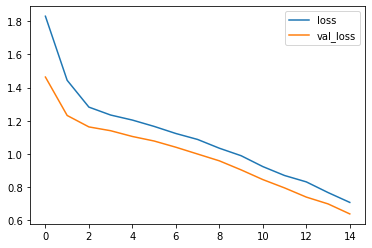

In [23]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, batch_size = 256)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation ='relu', input_shape = (50, 50, 1)))
model.add(keras.layers.BatchNormalization(axis = -1))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32, (3, 3), activation ='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(32, (3, 3), activation ='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization(axis = -1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate = 3e-4),
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0

2021-12-19 22:34:33.151902: W tensorflow/stream_executor/platform/default/dso_loader.cc:65] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-12-19 22:34:33.152019: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 22:34:33.152049: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nmjid5z1nm): /proc/driver/nvidia/version does not exist


In [5]:
loss = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)

2021-12-19 22:34:40.113085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
219/219 [==============================] - 49s 220ms/step - loss: 1.8764 - accuracy: 0.2896 - val_loss: 1.7192 - val_accuracy: 0.2967
Epoch 2/15
219/219 [==============================] - 46s 212ms/step - loss: 1.4390 - accuracy: 0.4199 - val_loss: 1.5264 - val_accuracy: 0.3623
Epoch 3/15
219/219 [==============================] - 47s 215ms/step - loss: 1.1733 - accuracy: 0.5156 - val_loss: 1.0445 - val_accuracy: 0.5880
Epoch 4/15
219/219 [==============================] - 46s 212ms/step - loss: 0.9432 - accuracy: 0.6146 - val_loss: 0.7030 - val_accuracy: 0.7430
Epoch 5/15
219/219 [==============================] - 47s 215ms/step - loss: 0.7388 - accuracy: 0.7120 - val_loss: 0.6067 - val_accuracy: 0.7373
Epoch 6/15
219/219 [==============================] - 47s 215ms/step - loss: 0.6185 - accuracy: 0.7614 - val_loss: 0.4640 - val_accuracy: 0.8740
Epoch 7/15
219/219 [==============================] - 47s 213ms/step - loss: 0.5119 - accuracy: 0.8247 - val_loss: 0.3799 - val_ac

In [6]:
pred = model.predict(X_test).argmax(axis=1)
print('Accuracy on train set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on train set - 97.03%


In [8]:
model.save('model.h5')

In [10]:
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

2021-12-19 22:49:02.327524: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 200000000 exceeds 10% of free system memory.


ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (10000, 50, 50)